# Calculate optimal 3 by 3 based on 2 by 2 model

In [1]:
import os
import sys
sys.path.append('../../..')

import numpy as np
import matplotlib.pyplot as plt
from metabatt.graph import Graph, Edge, Subgraphs
from metabatt.reinforce.environments import MetabattEnvSubgraphs
from metabatt.reinforce.agents import QAgentReplayMemory

---- start prediction using pretrained model -----
 new max record arrange grid:  2.5555555555555554
 new max record arrange grid:  2.888888888888889
   10 mean prediction reward:  2.44
   20 mean prediction reward:  2.47
   30 mean prediction reward:  2.44
   40 mean prediction reward:  2.39
   50 mean prediction reward:  2.43
   60 mean prediction reward:  2.43
   70 mean prediction reward:  2.38
   80 mean prediction reward:  2.37
   90 mean prediction reward:  2.43
  100 mean prediction reward:  2.37
  110 mean prediction reward:  2.40
  120 mean prediction reward:  2.32
  130 mean prediction reward:  2.46
  140 mean prediction reward:  2.43
  150 mean prediction reward:  2.23
  160 mean prediction reward:  2.37
  170 mean prediction reward:  2.46
  180 mean prediction reward:  2.46
  190 mean prediction reward:  2.30
  200 mean prediction reward:  2.39
  210 mean prediction reward:  2.53
  220 mean prediction reward:  2.36
  230 mean prediction reward:  2.49
  240 mean prediction 

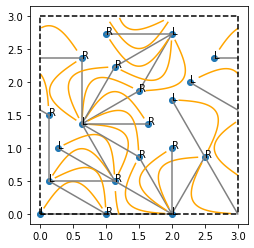

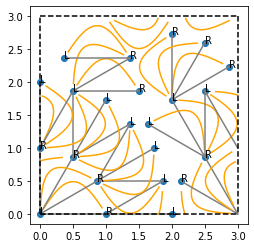

(array([  8.,  21.,  67., 133.,   0., 117.,  90.,  43.,  15.,   6.]),
 array([2.        , 2.08888889, 2.17777778, 2.26666667, 2.35555556,
        2.44444444, 2.53333333, 2.62222222, 2.71111111, 2.8       ,
        2.88888889]),
 <BarContainer object of 10 artists>)

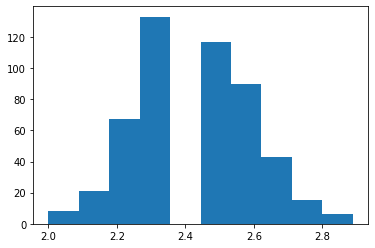

In [2]:
load_agent = QAgentReplayMemory.from_hyperparameters('../../2_by_2/30_degree_angles/hyperparams')
best_model = load_agent.load_model(file_name='../../2_by_2/30_degree_angles/model')

subgraphs = Subgraphs(angles=[0, 30, 60, 90, 120, 150, 180],
                      lengths=[1])

# create the environment
env = MetabattEnvSubgraphs(n_cells_x=4,
                           n_cells_y=4,
                           subgraphs=subgraphs)

# now use the new environment together with the pretrained agent
load_agent.env = env
load_agent.predict(model=best_model, num_episodes=500, epsilon=0, save_best_graph=True)
plt.show()
plt.hist(load_agent.rewards)

In [3]:
best_graph = Graph.load_graph_state('best_graph')
best_graph.plot()

FileNotFoundError: [Errno 2] No such file or directory: 'best_graph.pickle'

In [6]:
# save model parameters
load_agent.save_hyperparameters(fname='hyperparams')
# for saving the state of the model simply do
load_agent.save_model(load_agent.policy_dqn, file_name='model')

In [8]:
print(max(load_agent.rewards))

2.888888888888889
